# EXTRACT HEIGHTS OF MAJOR TOWNS IN KENYA FROM DEM

## By Kech_Cole



Given a digital elevation map(DEM) and a shapefile of major towns, extract heights of these towns using python. 

## 1. Load Modules and Data

In [1]:
# Load required modules

import geopandas as gpd              # Read shapefile
import rasterio                      # Read raster data
from rasterio.plot import show       # Ploting raster
import matplotlib.pyplot as plt      # Plot shapefile


In [2]:
# Load town point shapefile with digital elevation tif data 

towns = gpd.read_file(r'D:\Programs\Python\Jupiter notebook\Extracting Topographic Elevation of major towns\Data\Towns.shp')

dem = rasterio.open(r'D:\Programs\Python\Jupiter notebook\Extracting Topographic Elevation of major towns\Data\DEM.TIF')


In [3]:
# Data type

print(type(towns))
print(type(dem))


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'rasterio.io.DatasetReader'>


In [4]:
# Raster data attributes

dem.meta     # Resolution(height & width), axes rotation values, coordinates


{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 11299,
 'height': 13067,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS_1984_UTM_Zone_37N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(91.27599529746811, 0.0, -177536.2930890913,
        0.0, -90.72154733818205, 617566.928940404)}

In [5]:
# Town data attributes 

print(towns.head(20))

print('\n\n Column names ', towns.columns)


             TOWN  wanted                        geometry
0   Port Victoria       0    POINT (-57224.988 17707.973)
1          Luanda       0   POINT (-24451.831 -51770.721)
2           Busia       0    POINT (-45272.886 51657.324)
3         Bungoma       0      POINT (4816.124 62946.148)
4           Kisii       0    POINT (30438.575 -73995.053)
5          Kisumu       0     POINT (28950.691 -9290.653)
6           Ahero       0    POINT (45994.859 -17637.120)
7        Kiminini       0    POINT (46350.810 100368.469)
8           Sondu       0    POINT (56310.002 -41660.416)
9     Nandi Hills       0     POINT (75938.849 13249.465)
10         Kitale       0    POINT (49455.950 108683.915)
11       Kapsabet       0     POINT (66971.585 24262.852)
12        Kericho       0    POINT (86952.636 -39458.907)
13        Eldoret       0     POINT (85596.692 58905.468)
14           Iten       0    POINT (111799.637 76084.811)
15           Molo       0   POINT (137055.669 -25777.921)
16       Kabar

In [6]:
# Remove 'wanted' field since we dont need it by subsetting
towns = towns[['TOWN', 'geometry']]

towns.head(20)


,TOWN,geometry
0,Port Victoria,POINT (-57224.988 17707.973)
1,Luanda,POINT (-24451.831 -51770.721)
2,Busia,POINT (-45272.886 51657.324)
3,Bungoma,POINT (4816.124 62946.148)
4,Kisii,POINT (30438.575 -73995.053)
5,Kisumu,POINT (28950.691 -9290.653)
6,Ahero,POINT (45994.859 -17637.120)
7,Kiminini,POINT (46350.810 100368.469)
8,Sondu,POINT (56310.002 -41660.416)
9,Nandi Hills,POINT (75938.849 13249.465)


## 2. Plot Towns and DEM

In [7]:
# View coordinate reference system for both files

print('Coordinate sytem for towns file -\n',towns.crs)
print('\n\n Coordinate sytem for dem -\n',dem.crs)


Coordinate sytem for towns file -
 PROJCS["WGS_1984_UTM_Zone_37N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


 Coordinate sytem for dem -
 PROJCS["WGS_1984_UTM_Zone_37N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EA

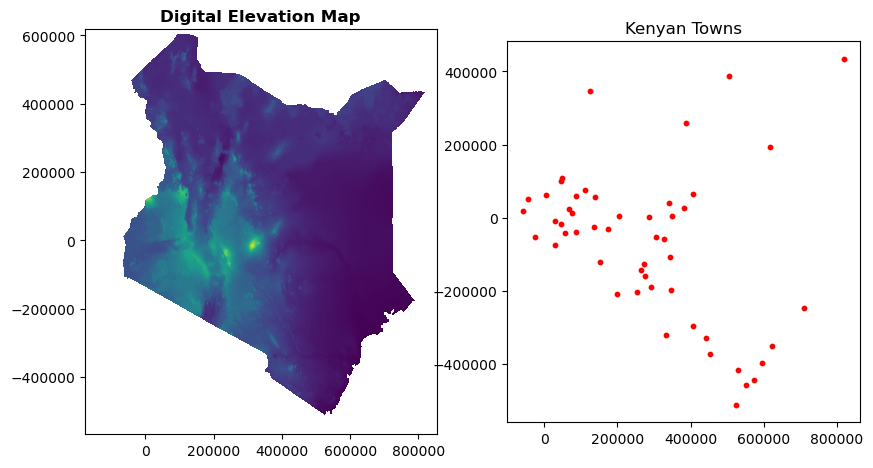

In [8]:
# Plot side by side, DEM on the left while towns on the right

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))
show(dem,                                 # First column place dem
     ax=ax1,                              # Axis
     title='Digital Elevation Map')       # Title
towns.plot(ax=ax2,                        # Second column
           color='red',                   # Point colour
          markersize=10)                   

ax2.set_title('Kenyan Towns')             # Title of second axis
plt.show()


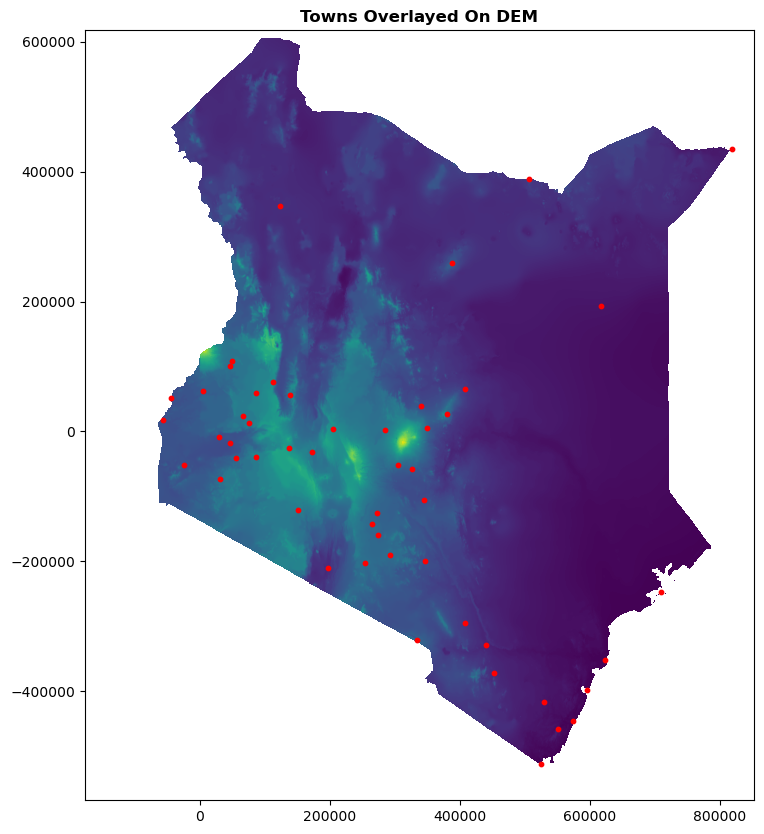

In [9]:
# Overlay towns on to dem file

fig, ax = plt.subplots(figsize=(15, 10))
show(dem,                                 # First layer
     ax=ax,                               # Axis
     title='Towns Overlayed On DEM')      # Title
towns.plot(ax=ax,                          # Same axis
           color='red',                    # Points colour
           markersize=10)                  # Points size
plt.show()

## 3. Extract Data

In [10]:
# Loop through the data to get the name of town and coordinates 

for index, row in towns.iterrows():
    print(index)                     # Field ID
    print(row['TOWN'])               # Town name
    print(row['geometry'], '\n')     # coordinates
    

0
Port Victoria
POINT (-57224.98842510127 17707.97288522556) 

1
Luanda
POINT (-24451.831141746137 -51770.720817933434) 

2
Busia
POINT (-45272.886067718384 51657.32445787897) 

3
Bungoma
POINT (4816.123603161657 62946.148320386856) 

4
Kisii
POINT (30438.57490841049 -73995.05316844147) 

5
Kisumu
POINT (28950.69121693226 -9290.652878257497) 

6
Ahero
POINT (45994.858853385784 -17637.12003503328) 

7
Kiminini
POINT (46350.810192832374 100368.4691609769) 

8
Sondu
POINT (56310.00196612795 -41660.41603987183) 

9
Nandi Hills
POINT (75938.84880494606 13249.464567931009) 

10
Kitale
POINT (49455.949744065 108683.9149055094) 

11
Kapsabet
POINT (66971.58521506429 24262.852179993744) 

12
Kericho
POINT (86952.63577225356 -39458.90727333755) 

13
Eldoret
POINT (85596.69195170049 58905.46790366113) 

14
Iten
POINT (111799.63671435218 76084.81110599307) 

15
Molo
POINT (137055.6686093494 -25777.921414436074) 

16
Kabarnet
POINT (139382.77340835042 55655.76951516346) 

17
Narok
POINT (151163.510

In [11]:
# Extract Feature attribute of towns and assign variables.
# Then use coordinate values to get their corresponding pixel position 

for index, row in towns.iterrows():
    # Towns feature variables
    town_name = row['TOWN']         # Town name
    lat = row['geometry'].y         # Latitude coordinates
    long = row['geometry'].x        # Longitude coordinates
    
    # Use coordinates to identify pixel position from dem, row and column number
    row, column = dem.index(long, lat)
    print(town_name , ' is at pixel position - ',row, column)
    

Port Victoria  is at pixel position -  6612 1318
Luanda  is at pixel position -  7377 1677
Busia  is at pixel position -  6237 1449
Bungoma  is at pixel position -  6113 1997
Kisii  is at pixel position -  7622 2278
Kisumu  is at pixel position -  6909 2262
Ahero  is at pixel position -  7001 2448
Kiminini  is at pixel position -  5700 2452
Sondu  is at pixel position -  7266 2561
Nandi Hills  is at pixel position -  6661 2777
Kitale  is at pixel position -  5609 2486
Kapsabet  is at pixel position -  6539 2678
Kericho  is at pixel position -  7242 2897
Eldoret  is at pixel position -  6157 2882
Iten  is at pixel position -  5968 3169
Molo  is at pixel position -  7091 3446
Kabarnet  is at pixel position -  6193 3472
Narok  is at pixel position -  8135 3601
Nakuru  is at pixel position -  7157 3840
Lodwar  is at pixel position -  2984 3303
Magadi  is at pixel position -  9117 4109
Nyahururu  is at pixel position -  6760 4197
Kajiado  is at pixel position -  9043 4729
Konza  is at pixel

In [12]:
# Read elevation data by creating an array from dem and loop through each pixel position while capturing array value 

# Create an array from dem_array 
dem_array = dem.read(1)

# Add elevation values to towns dataframe
for index, row in towns.iterrows():
    
    lat = row['geometry'].y         # Latitude
    long = row['geometry'].x        # Longitude
    
    # Use coordinates to identify pixel position from dem, row and column number
    row, column = dem.index(long, lat)
    
    # Update heights column value with dem_array value, new column 'heights' is created at first loop
    towns.at[index, 'heights'] = dem_array[row, column]
    
    
# Out of loop
print(towns)


             TOWN                        geometry  heights
0   Port Victoria    POINT (-57224.988 17707.973)   1098.0
1          Luanda   POINT (-24451.831 -51770.721)   1154.0
2           Busia    POINT (-45272.886 51657.324)   1213.0
3         Bungoma      POINT (4816.124 62946.148)   1403.0
4           Kisii    POINT (30438.575 -73995.053)   1688.0
5          Kisumu     POINT (28950.691 -9290.653)   1143.0
6           Ahero    POINT (45994.859 -17637.120)   1127.0
7        Kiminini    POINT (46350.810 100368.469)   1767.0
8           Sondu    POINT (56310.002 -41660.416)   1463.0
9     Nandi Hills     POINT (75938.849 13249.465)   1980.0
10         Kitale    POINT (49455.950 108683.915)   1828.0
11       Kapsabet     POINT (66971.585 24262.852)   1981.0
12        Kericho    POINT (86952.636 -39458.907)   2104.0
13        Eldoret     POINT (85596.692 58905.468)   2133.0
14           Iten    POINT (111799.637 76084.811)   2300.0
15           Molo   POINT (137055.669 -25777.921)   2379

## 5.Save data

In [13]:
# Save data into as csv file

# Subsets towns data by selecting columns interested in, data will be converted to a pandas dataframe
kenyan_town_heights = towns[['TOWN', 'heights']]

print(type(kenyan_town_heights))

# Save 
kenyan_town_heights.to_csv('Topo_heights_kenyan_towns.csv')


<class 'pandas.core.frame.DataFrame'>
